**Load the data**

In [28]:
# Load the dataset
import pandas as pd
df = pd.read_csv('BTCUSDT_1h.csv')
df.head()

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999000-05:00,202366.138393,35.160503,150952.477943
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000-05:00,100304.823567,21.448071,92608.279728
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000-05:00,31282.312670,4.802861,20795.317224
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000-05:00,19241.058300,2.602292,11291.347015
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000-05:00,4239.503586,0.814655,3552.746817


In [1]:
import torch
torch.__version__

'2.2.2+cu118'

In [29]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              38461 non-null  float64
 1   high              38461 non-null  float64
 2   low               38461 non-null  float64
 3   close             38461 non-null  float64
 4   volume            38461 non-null  float64
 5   close_time        38461 non-null  object 
 6   quote             38461 non-null  float64
 7   takers_buy_base   38461 non-null  float64
 8   takers_buy_quote  38461 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.6+ MB


In [30]:
# Any missing data?
df.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
close_time          0
quote               0
takers_buy_base     0
takers_buy_quote    0
dtype: int64

In [31]:
# Data description
df.describe()

,open,high,low,close,volume,quote,takers_buy_base,takers_buy_quote
count,38461.000000,38461.000000,38461.000000,38461.000000,38461.000000,3.846100e+04,38461.000000,3.846100e+04
mean,17589.002805,17696.560219,17473.314191,17589.962025,2101.814189,4.369855e+07,1046.701701,2.159233e+07
std,17359.685254,17463.372583,17249.006318,17359.989729,2175.337360,7.080532e+07,1066.267302,3.481741e+07
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,6726.000000,6752.760000,6695.490000,6726.110000,919.149470,7.125238e+06,470.170524,3.665090e+06
50%,9298.330000,9339.370000,9259.980000,9298.750000,1536.182670,1.545427e+07,773.216614,7.739254e+06
75%,19024.330000,19125.760000,18900.000000,19026.490000,2571.497519,5.187811e+07,1279.230445,2.529690e+07
max,68635.120000,69000.000000,68451.190000,68633.690000,47255.762685,1.514465e+09,20628.794047,6.849674e+08


In [32]:
# Timeline of the dataset
df['close_time'].min(), df['close_time'].max()

('2017-08-16 23:59:59.999000-05:00', '2022-01-10 17:59:59.999000-05:00')

In [33]:
# Change column close_time to date time style
df['close_time'] = pd.to_datetime(df['close_time'], errors='coerce')


In [34]:
df['close_time'].dt.tz_localize(None)
df

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999000-05:00,2.023661e+05,35.160503,1.509525e+05
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000-05:00,1.003048e+05,21.448071,9.260828e+04
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000-05:00,3.128231e+04,4.802861,2.079532e+04
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000-05:00,1.924106e+04,2.602292,1.129135e+04
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000-05:00,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999000-05:00,7.523858e+07,968.387390,4.012530e+07
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999000-05:00,5.637205e+07,690.382540,2.864461e+07
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999000-05:00,5.161796e+07,642.619620,2.663620e+07
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999000-05:00,5.703537e+07,724.557670,3.026707e+07


In [35]:
df.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
close_time          2
quote               0
takers_buy_base     0
takers_buy_quote    0
dtype: int64

In [36]:

# Drop rows where datetime is nan
df.dropna(subset=['close_time'], inplace=True)

df

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999000-05:00,2.023661e+05,35.160503,1.509525e+05
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000-05:00,1.003048e+05,21.448071,9.260828e+04
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000-05:00,3.128231e+04,4.802861,2.079532e+04
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000-05:00,1.924106e+04,2.602292,1.129135e+04
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000-05:00,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999000-05:00,7.523858e+07,968.387390,4.012530e+07
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999000-05:00,5.637205e+07,690.382540,2.864461e+07
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999000-05:00,5.161796e+07,642.619620,2.663620e+07
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999000-05:00,5.703537e+07,724.557670,3.026707e+07


In [37]:
df_plot = df.copy()
# Set date_time to index
df_plot = df_plot.set_index('close_time')

df_plot

,open,high,low,close,volume,quote,takers_buy_base,takers_buy_quote
close_time,,,,,,,,
2017-08-16 23:59:59.999000-05:00,4261.48,4313.62,4261.32,4308.83,47.181009,2.023661e+05,35.160503,1.509525e+05
2017-08-17 00:59:59.999000-05:00,4308.83,4328.69,4291.37,4315.32,23.234916,1.003048e+05,21.448071,9.260828e+04
2017-08-17 01:59:59.999000-05:00,4330.29,4345.45,4309.37,4324.35,7.229691,3.128231e+04,4.802861,2.079532e+04
2017-08-17 02:59:59.999000-05:00,4316.62,4349.99,4287.41,4349.99,4.443249,1.924106e+04,2.602292,1.129135e+04
2017-08-17 03:59:59.999000-05:00,4333.32,4377.85,4333.32,4360.69,0.972807,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...
2022-01-10 13:59:59.999000-05:00,41184.44,41723.87,41118.36,41604.58,1816.054560,7.523858e+07,968.387390,4.012530e+07
2022-01-10 14:59:59.999000-05:00,41604.58,41698.07,41205.65,41297.15,1358.541170,5.637205e+07,690.382540,2.864461e+07
2022-01-10 15:59:59.999000-05:00,41297.15,41779.46,41158.99,41714.72,1245.440490,5.161796e+07,642.619620,2.663620e+07


In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [39]:
df_plot.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
quote               0
takers_buy_base     0
takers_buy_quote    0
dtype: int64

**Exploratory Data Analysis**

*Time series plot (Price and Time)*

- To observe the overall trend and seasonality in Bitcoin prices over time.

- Identify patterns, trends, or cyclic behavior which are crucial for deciding on the type of models to use

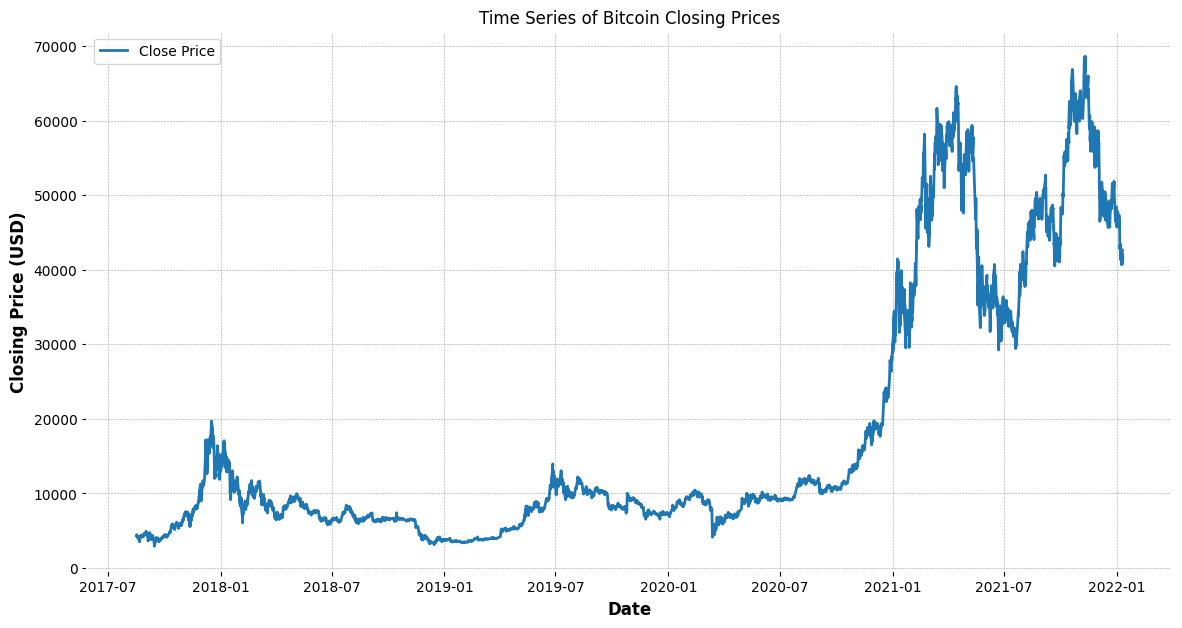

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(df_plot.index, df_plot['close'], label='Close Price')
plt.title('Time Series of Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

- Long-Term Growth: The chart shows a long-term upward trend in Bitcoin prices, especially noticeable from late 2020 through late 2021. This suggests that Bitcoin has experienced significant appreciation over time, particularly during this period.

- Volatility: Bitcoin's price is highly volatile. There are several sharp peaks and troughs throughout the series, indicating sudden increases and decreases in price. The most notable peaks occur around late 2017 and late 2021, which were followed by significant declines.

- Cyclic Patterns: There seem to be cyclical patterns where a sharp rise in prices is often followed by a downturn. This cycle appears to have a periodicity of roughly a year, where each peak is followed by a correction phase.

- Recent Trends: In the most recent data, there appears to be a downward trend starting from the peak in late 2021. This might indicate a bearish market phase, which could be driven by various external factors such as regulatory news, changes in investor sentiment, or broader economic conditions.

**Possible Implications:**

- Investor Sentiment: The peaks and sharp declines might correlate with changes in investor sentiment, possibly influenced by external news, technological developments, or macroeconomic factors.

- Market Speculation: The sharp rises and falls could be indicative of speculative trading behavior in the cryptocurrency market.

- Risk Assessment: The high volatility highlighted by the chart underscores the risk associated with investing in Bitcoin. Potential investors should consider this when making investment decisions.

**Further Analysis:**

- Correlation with Events: Analyzing these price movements in conjunction with major cryptocurrency or financial events could provide insights into what drives significant changes in Bitcoin prices.

*Volume and Price Correlation Plot*

- To investigate the relationship between trading volume and price changes.

- Show how volume might impact price fluctuations

- Observing how these two metrics trend together can help identify if large price movements are typically accompanied by high trading volumes, which is often the case during significant market events

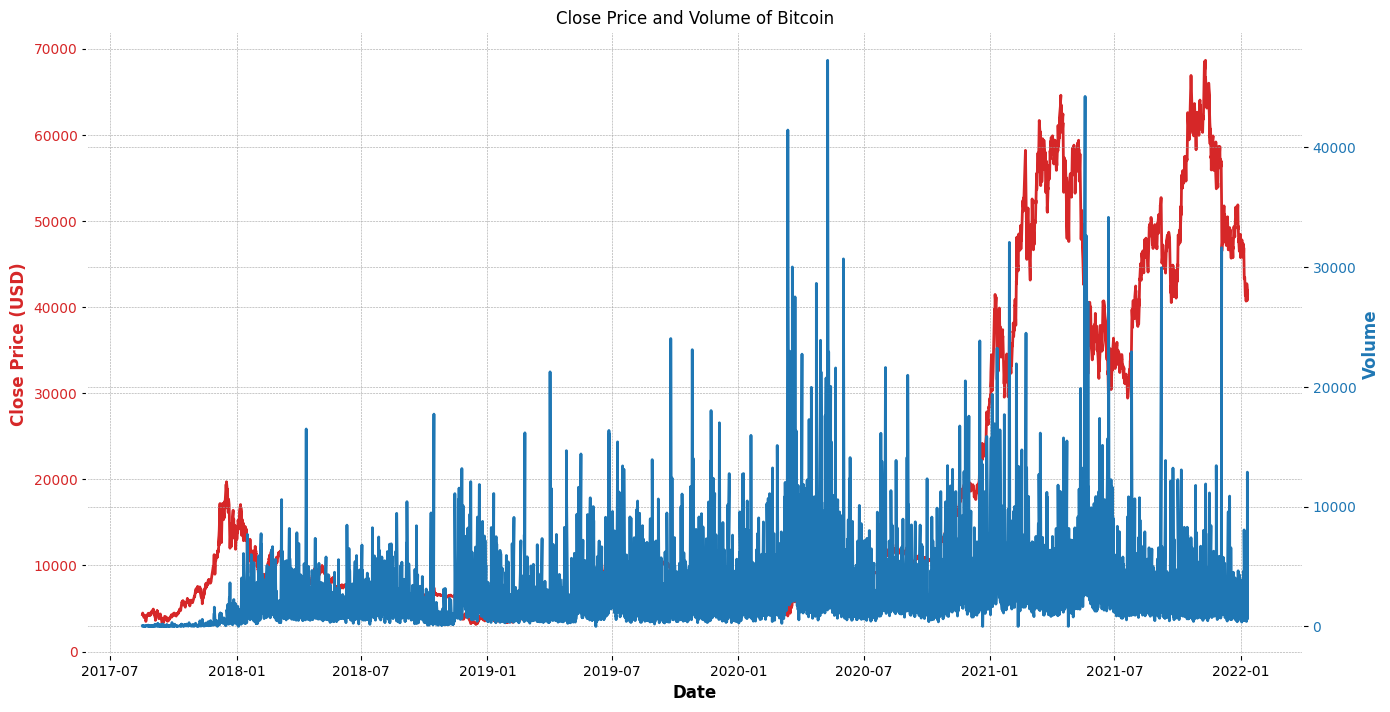

In [41]:
# Create a dual-axis time series plot for volume and closing price
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color=color)
ax1.plot(df_plot.index, df_plot['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df_plot.index, df_plot['volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Close Price and Volume of Bitcoin')
plt.show()

**Observations:**

- Price Trends: The red line represents the closing prices of Bitcoin, showing significant volatility. There are notable peaks around December 2017, early 2021, and late 2021, which correspond to major bull runs in the cryptocurrency market.

- Volume Trends: The blue bars represent the trading volume of Bitcoin. There's a clear correlation between spikes in trading volume and significant movements in the price, particularly noticeable at the peaks and troughs of the price line.

**Correlation of Volume and Price:**

- Volume Peaks Coinciding with Price Changes: Major peaks in trading volume often occur just before or during sharp rises or falls in price, suggesting that high trading activity may precede and accompany significant price movements.
  
- Volume Sustaining High Prices: During periods where the price remains high or is escalating, trading volume also appears elevated, which might indicate sustained buying interest or speculative trading during these times.
  
**Analysis:**

- Market Sentiment and Speculation: The correlation between high volumes and significant price changes might reflect market sentiment, where increased buying drives prices up, and selling pressure leads to price drops. These periods of high volume and price fluctuation could also reflect times of market speculation and increased investor interest in Bitcoin.

- Liquidity and Price Stability: High trading volumes generally increase market liquidity, which can lead to more price stability. However, in the case of Bitcoin, these high volumes are often associated with less stability, likely due to the speculative nature of the market.

- Investor Behavior: The peaks in trading volume associated with drastic price changes might also indicate panic selling or fear of missing out (FOMO) buying behaviors, common in highly volatile markets like cryptocurrencies.

*Candlestick chart*

- To provide a detailed view of price movement within short intervals and to observe the trading behavior

- Intraday price movements, as it shows the open, high, low, and close prices in a visually intuitive manner.

C:\Users\linhn\AppData\Local\Temp\ipykernel_12320\3116260881.py:3: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  latest_data = df_plot.last('3M')
C:\Users\linhn\AppData\Local\Temp\ipykernel_12320\3116260881.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  latest_data = df_plot.last('3M')
c:\Users\linhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


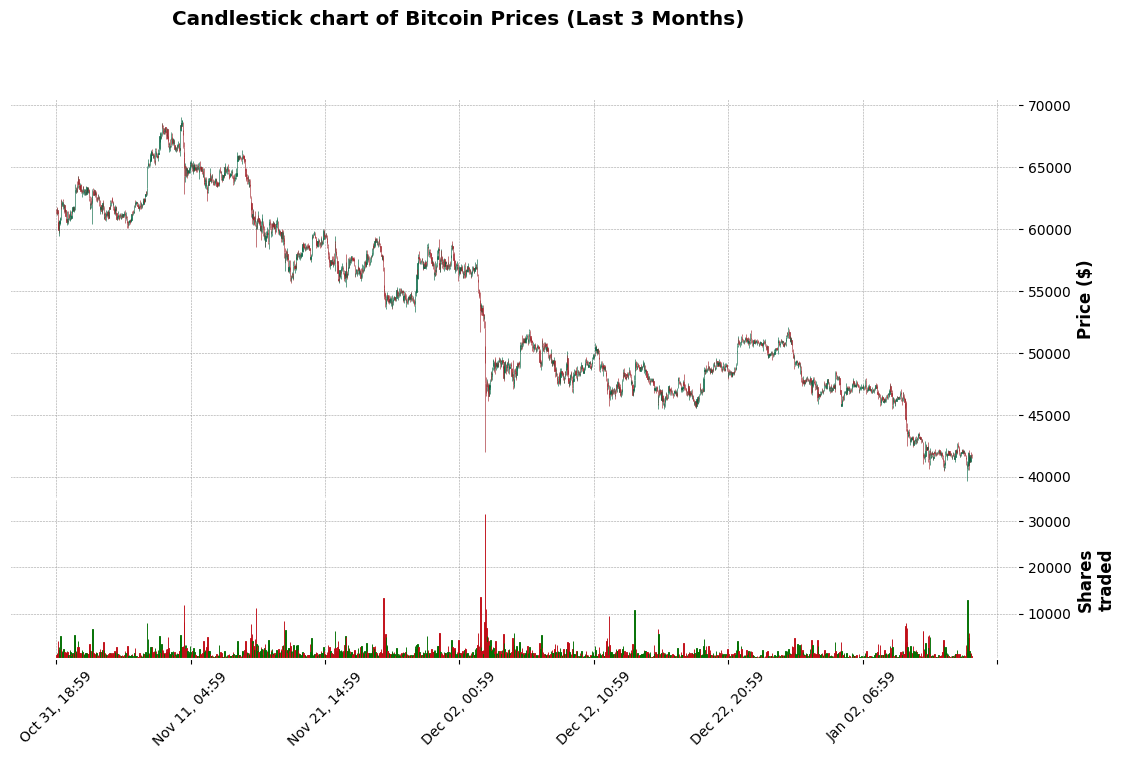

In [42]:
import mplfinance as mpf

latest_data = df_plot.last('3M')

mpf.plot(latest_data, type='candle', style='charles', title='Candlestick chart of Bitcoin Prices (Last 3 Months)',
         ylabel='Price ($)', volume=True, ylabel_lower='Shares\ntraded', figsize=(14, 8))

*Histogram of Price Changes*

- To understand the distribution of price changes and identify outliers or anomalies
  
- Indicate the volatility and the normality of price movements

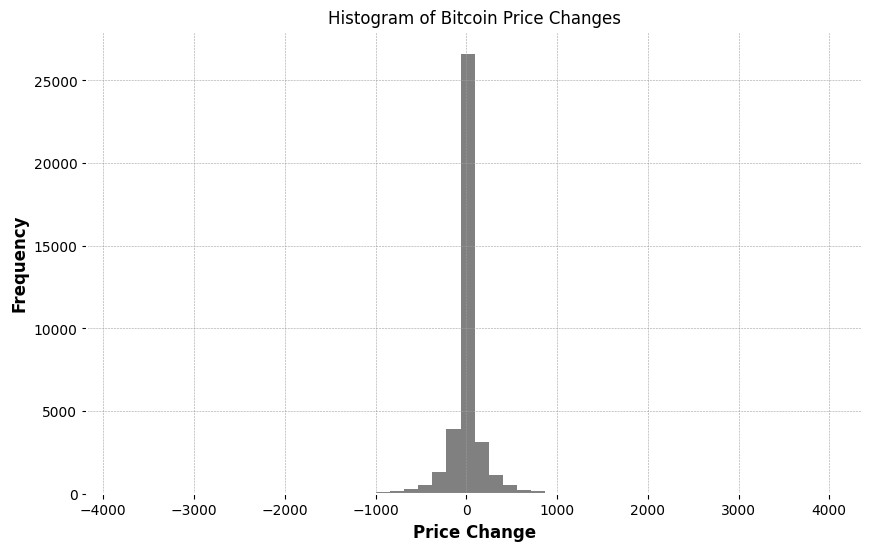

In [43]:
# Calculate daily price changes
df_plot['price_change'] = df_plot['close'].diff()

# Plot histogram of price changes
plt.figure(figsize=(10, 6))
plt.hist(df_plot['price_change'], bins=50, color='gray')
plt.title('Histogram of Bitcoin Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

*Rolling Mean and Standard Deviation (trend and volatility)*

- To examine the moving average to smooth out short-term fluctuations and highlight longer-term trends in Bitcoin prices.

- Identifying the stability of price over time, which is useful for detecting volatility.

- The rolling mean helps in understanding the overall trend, smoothing out short-term fluctuations. The rolling standard deviation indicates the volatility, with higher values representing more uncertainty in price changes.


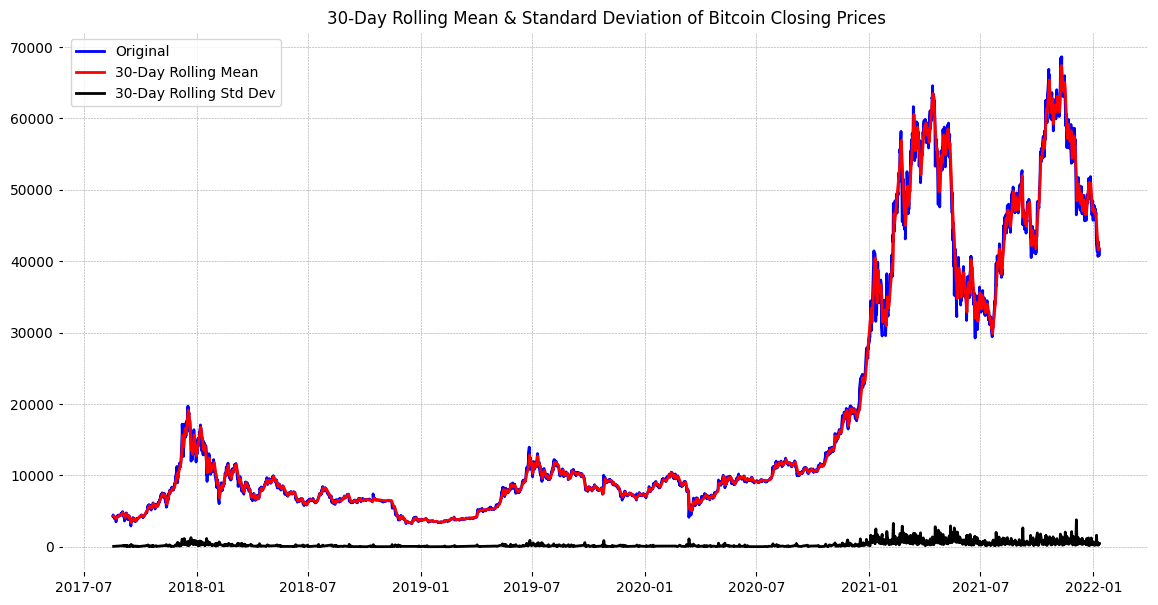

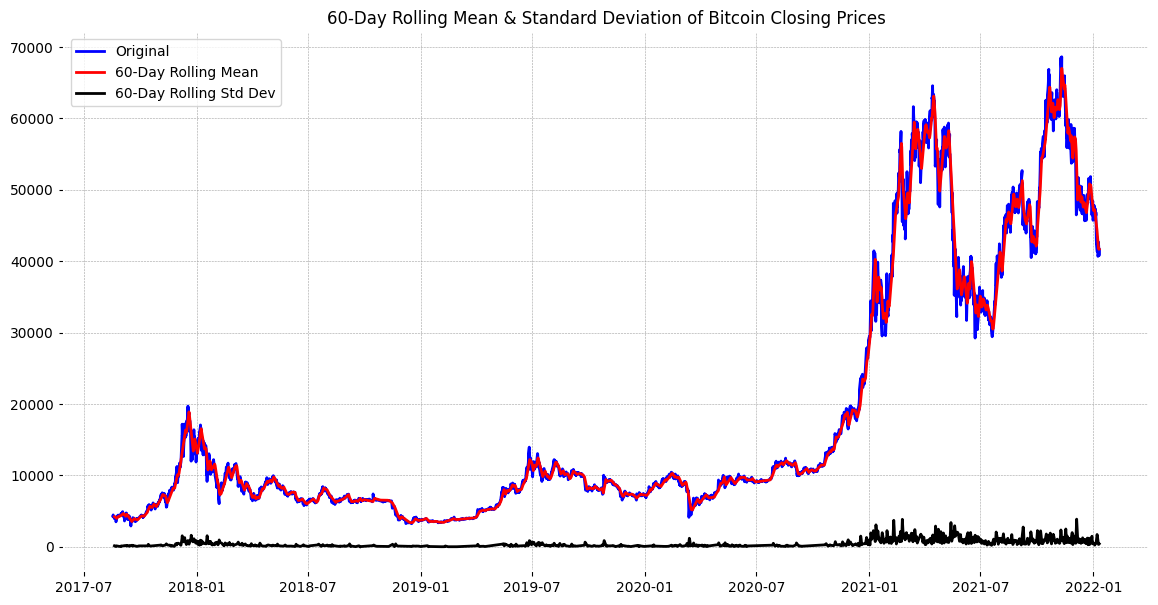

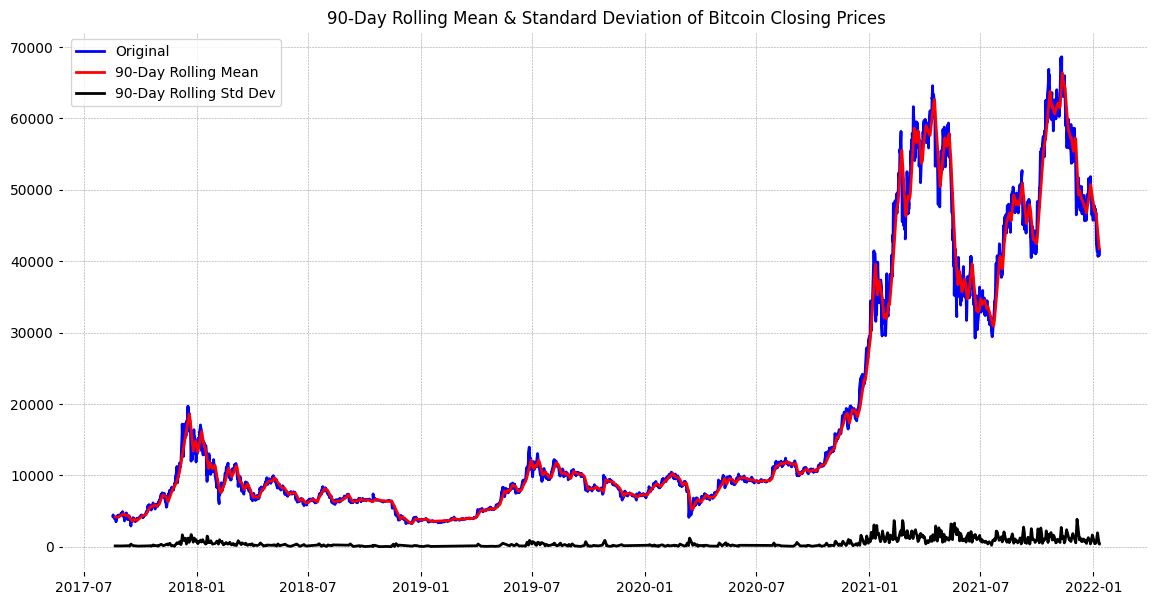

In [44]:
rolling_window = [30, 60, 90]

for _ in rolling_window:
    rolling_mean = df_plot['close'].rolling(window = _).mean()
    rolling_std = df_plot['close'].rolling(window=_).std()

    # Plot the rolling statistics
    plt.figure(figsize=(14, 7))
    plt.plot(df_plot['close'], color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label=f'{_}-Day Rolling Mean')
    plt.plot(rolling_std, color='black', label=f'{_}-Day Rolling Std Dev')
    plt.legend(loc='best')
    plt.title(f'{_}-Day Rolling Mean & Standard Deviation of Bitcoin Closing Prices')
    plt.show()

**30-Day Rolling Mean and Standard Deviation:**

Short-term Trends: The 30-day metrics provide a closer look at short-term trends and volatility. The mean line smooths out daily price fluctuations, showing broader movements without the noise of daily volatility.

Volatility: The standard deviation is relatively low during stable periods and spikes during periods of high price fluctuations, such as late 2017 and early 2021.

**60-Day Rolling Mean and Standard Deviation:**

Medium-term Trends: Doubling the window to 60 days provides a smoother trend line, reducing the impact of short-term price spikes and dips. It offers a clearer view of medium-term trends.

Volatility Smoothing: The standard deviation also becomes smoother, highlighting periods of sustained volatility more clearly than short-term spikes.

**90-Day Rolling Mean and Standard Deviation:**

Long-term Trends: Extending to a 90-day window provides the smoothest overview of Bitcoin's price trends, ideal for identifying long-term movements.

Reduced Volatility Visibility: While this window smooths out most of the minor fluctuations, it still marks the major volatile periods, albeit less sharply than the shorter windows.

**General Observations Across the Charts:**

Peak Volatility: All three charts show peak volatility around the same periods—late 2017 and early 2021—corresponding to significant price movements in Bitcoin’s market history.

Trend Confirmation: The moving averages confirm sustained upward or downward trends. For instance, a consistently rising moving average through 2020 into early 2021 indicates a strong bull market.

Volatility Patterns: The standard deviation provides insights into the risk associated with Bitcoin during various periods. Higher standard deviations indicate higher risk and greater uncertainty in price movements.

Market Sentiment: These metrics can also reflect market sentiment. For example, rapid increases in the rolling mean accompanied by increasing standard deviations might suggest a FOMO-driven (fear of missing out) rally, which could be riskier for new investments.

**Check seasonality**

- ADF Statistic: The value displayed (-0.77887075172332) is the test statistic. This value needs to be compared against critical values to determine the stationarity of the series.
  
- p-value: The p-value (0.82527) is significantly above 0.05, suggesting that the null hypothesis of the presence of a unit root (i.e., the series is non-stationary) cannot be rejected.
  
- Critical Values: The test shows critical values for different confidence levels (1%, 5%, 10%). The ADF statistic is much higher (less negative) than any of these, confirming the non-stationary diagnosis, reject the null hypothesis at these levels.

In [72]:
from sklearn.model_selection import train_test_split

y = df_plot['close']
X = df_plot.drop(['close'], axis = 1)

# Splitting the dataset into training, validation and test

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state=42 )

X_val, X_test, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state = 42)

y_train_or = y_train.sort_index()
y_train_or

missing_values = y_train_or.isnull().sum()
missing_values

0

In [73]:
from statsmodels.tsa.stattools import adfuller
# stationarity check
if missing_values == 0:
    # Checking for temporal order 
    is_temporal = isinstance(y_train_or.index, (pd.DatetimeIndex, pd.PeriodIndex))
    
    if is_temporal:
        print("y_train is temporal order and without missing values time series.")
        # perform the Dickey-Fuller test to check for stationarity
        def check_stationarity(timeseries):
            result = adfuller(timeseries, autolag='AIC')
            print(result)
            if result[1] <= 0.05:
                print("Series is stationary")
            else:
                print("Series is not stationary")
           
        # ordered y_train data
        check_stationarity(y_train_or)
    else:
        print("The data is not in temporal order.")
else:
    print("There are missing values in the data.")

y_train is temporal order and without missing values time series.
(-0.8207109575484515, 0.8129625551868169, 48, 30718, {'1%': -3.430562899490169, '5%': -2.861634095900675, '10%': -2.566820084362418}, 422873.5880026371)
Series is not stationary


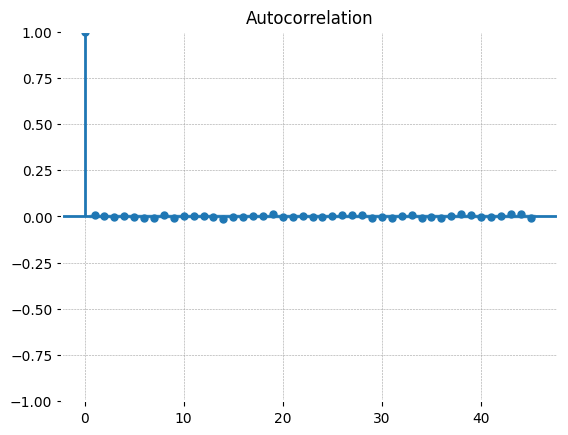

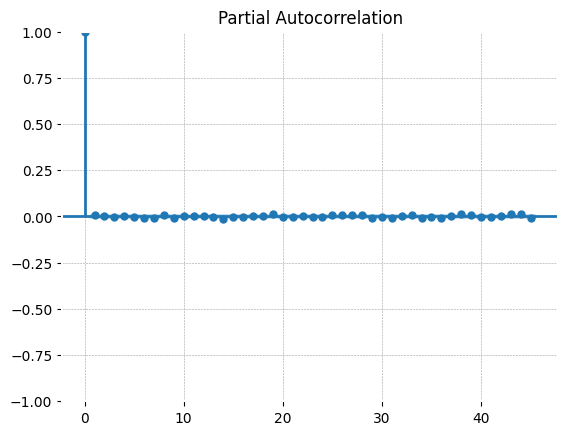

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y_train)
plot_pacf(y_train)
plt.show()

# Model